# Algorithm Analysis and Big O Notation

We now start to look at the process of *algorithm analysis*. As the name implies, this topic revolves around analyzing algorithms, mostly with regard to their *running time*.

Consider we have a specific problem to solve, such as sorting a list of integers. There will often be different algorithms to solve the same problem. But which should we choose? If the different algorithms have the same output, one natural criterion would be to select the fastest algorithm, meaning the one with the shortest *running time*.

In a scenario where we have implemented a specific sorting algorithm, we can run this algorithm and measure how long it takes to sort some specific list. This is called *profiling*, and it is a topic we will return to later. However, the algorithm running time will depend on the size of the list it has to sort. We can therefore give it inputs of different sizes, $n$, and measure the time it takes for each one. Plotting the run time as a function of the number of elements, $t(n)$, shows how the sorting algorithm scales with the input size.

Now, if we have implemented a few different sorting algorithms, we can plot such a curve for each algorithm and thus compare them. However, this approach has a few major problems.
1. To measure the run-time in this manner, we need to execute the algorithm. This has two implications: (1) We need to have implemented the algorithm. We would rather analyze different algorithms to find the best one and then implement it for our given use case. Implementing all of them first means we do not save any time. (2) For testing large inputs, executing an algorithm can take significant time.

2. The concept of *running time* is strongly dependent on what computer the code is run on. A faster computer will have a lower runtime. Thus to compare algorithms, we need to do all experiments on the same machine. Moreover, even on the same machine, running a program twice is not guaranteed to take equally long, as other processes running simultaneously on the machine might make things slower. Consequently, getting a reliable comparison between algorithms involves taking the average of *multiple* experiments per input, taking even longer.

Given these downsides, performing algorithmic comparisons in the mentioned manner can take a lot of time and might not work that well, requiring a better way to compare algorithms.



## Theoretical Algorithm Analysis

To avoid implementing and running the algorithms, we turn instead to analyzing them theoretically. This makes sense because algorithms are essentially *abstract* concepts that exist only in theory. Thus we turn from *testing implementations* to *analyzing algorithms*. This approach also gets around the second mentioned downside since the analysis will no longer be connected to any given machine.

### Counting Operations

As we are moving away from the concept of "runtime," since this depends on a given machine, we need to find another measure of how "long" an algorithm takes to run. We want, therefore, not to measure how long the algorithm takes to run in time but how *much work* an algorithm has to perform.

To measure how much work we perform when executing an algorithm, we must go through it and count the number of required operations. Here we need to be more precise in what we mean by "operation." An "operation," in this sense, is any of the *primitive* operations the computer performs. Examples of primitive operations are
* Assigning a value to a (simple) variable
* Calling a method
* Comparing two numbers
* Indexing into an array
* Following an object reference
* Returning from a method

These operations do not take exactly the same amount of time, but to make algorithm analysis simpler, we assume that they do and count all into the same lump sum of performed operations.

For numerical algorithms, we often instead count the number of *floating point* operations: addition, subtraction, multiplication, and division of two floating point numbers. Different numerical algorithms, such as the Forward Euler scheme and the Runge-Kutta 4 scheme for solving ODEs, might require a very different amount of operations.

### Example: finding the biggest element in a list

Let us look at a simple algorithm for finding the biggest number in a list of numbers: We write it out in Python as an alternative to pseudocode. However, note that we are trying to analyze the abstract algorithm and not any given implementation in Python.

```Python
def find_biggest(numbers):
    biggest = numbers[0]

    for i in range(1, len(numbers)):
        if numbers[i] > biggest:
            biggest = numbers[i]

    return biggest
```

Let us now count the number of operations in this algorithm. The first assignment takes two operations because we assign a value to `biggest`, and read `numbers[0]`. At the end, we return a number, which is also a single operation. So regardless of the size of the input list, we use 3 operations in addition to the loop.

Next, we investigate the loop, which will run $(n - 1)$ times as we can skip the first element of the list. For each iteration, we will assign the counter `i` (1 operation) and perform one comparison between `biggest` and the next element in the list (2 operations, one for the comparison and one for the indexing). If the new element is larger than the previous `biggest` value, we assign it as the variable's new value (2 operations, one for the indexing, one for the assignment). Thus each iteration will be 3 or 5 operations.

If the first element of the input array happens to be the biggest, then we never reassign inside the loop, and the total number of operations will be

$$
    3(n - 1) + 3 = 3n.
$$

On the other hand, if the input list is ordered in increasing order, we will reassign every single time, giving a total number of operations of

$$
    5(n - 1) + 3 = 5n - 2.
$$


This means that running the `find_biggest` algorithm will take between $3n$ and $5n - 2$ operations, depending on the input. As this simple example illustrates, getting the exact count is a bit erratic. What should count as one operation? What should count as two? Also, the input might vary not only in size ($n$) but also in layout.

We will now introduce two concepts to make the analysis easier.



## Best-case, Average-case and Worst-case scenarios

As we saw in the `find_biggest` example, our algorithm will have a different number of operations depending on what the input is. We can refer to the different cases by calling them the "best-case" and the "worst-case" scenarios. In our example, having the first element be the biggest was the best case because it does not require any reassignment. Having all elements in increasing order would be the "worst-case" because it would take the longest. Somewhere in the middle lies the average case, which would be operations we would need on the average input.

Often when analyzing algorithms, we limit ourselves to analysing worst-case scenarios. If there is a best case, that is great, but often we want to have a guarantee about how slow an algorithm can be in the worst case. Analyzing the average case is even harder, as we would need to find out what the "average" input is, which would depend on the problem setting and the use case.

Put simply: To avoid having to think too much about different orders of input and such, we simply analyze the worst-case in most situations. Sometimes we also do the best-case scenario, but we rarely analyze the average case.


## Asymptotic Analysis with Big O Notation

The other simplification we do is to disregard small details and instead focus solely on how the algorithm *scales*. This is known as asymptotic analysis. It is most common to do this through the use of something called [Big O notation](https://www.geeksforgeeks.org/analysis-algorithms-big-o-analysis/), sometimes referred to as "big Oh" instead of "big O." We call it "big O" because we write it out as a function inside a big O, for example, $\mathcal{O}(n^2)$.

As before, we are still trying to classify how much work an algorithm has to perform as a function of the problem "input size," often denoted $n$. For array operations, $n$ will often be the length of an array or list, but it can also be an integer: for example, when checking whether $n$ is prime or finding the $n$'th Fibonacci number. $n$ could also be the size of a matrix in linear algebra operation. What is the cost of multiplying two $n \times n$ matrices, for example? Likewise, what is the cost of finding the eigenvalues of a $n\times n$ matrix?

We want to classify the *cost* of the algorithm in terms of the problem size. Note that the problem size will be non-negative ($n\geq 0$). It is possible, for example, to sort a list of 1 or 0 elements, but sorting a list with a negative number of elements does not make sense. Also, the cost of the algorithm will tend to either stay constant or grow with the problem size $n$. It would require a very uncommon problem or algorithm to become *easier* as the problem grows!

### Finding the Big O cost

As shown in an earlier example, we can go through all the steps in an algorithm, count the number of *primitive operations*, and arrive at an expression for the cost of the algorithm, such as

$$
    f(n) = 2n^2 + 4n + 1.
$$

Big O notation is then a way to simplify this expression, throwing away unnecessary details. The aim is to only describe how the whole expression scales as $n$ grows. In this sense, the $+1$ part is definitely unimportant, and when $n$ grows large, the quadratic term ($2n^2$) will rapidly outgrow the linear term ($4n$). We, therefore, first say that, at least for larger $n$,

$$
    f(n) \approx 2n^2.
$$

But with big O, we go one step further and disregard coefficient 2 as well. We would then write

$$
    f(n) = \mathcal{O}(n^2).
$$

We read this out as $f$ is big O of $n^2$.

We can do the same for any function, simply keeping the fastest-growing term and throwing away any coefficients. For polynomials, this is nearly trivial: simply check what the highest power is. A $k$-th degree polynomial function is $\mathcal{O}(n^k)$. However, we can also do it for other, more complicated functions.
* $7n - 2 = \mathcal{O(n)}$
* $n\log n + 2n + 10^{100} = \mathcal{O}(n\log n)$
* $2^n + n^{10} = \mathcal{O}(e^n)$ (we changed the base from 2 to $e$, but this adds a constant coefficient, which we throw away)

Similarly, some algorithms do not increase their cost with $n$ at all, as we throw away the "coefficients," resulting in a complexity of $\mathcal{O(1)}$, as follows
* $f(n) = 1 = \mathcal{O}(1)$
* $f(n) = 1000 = \mathcal{O}(1)$
* $f(n) = 2^{100} = \mathcal{O}(1)$


### What Big O Tells Us

What we are trying to capture with the big O notation is how the function scales with $n$. We know, for example, that a $\mathcal{O}(1)$ does *not* grow with the problem size, and we say that the cost is *constant*. Knowing just the big O of the algorithm does not actually say anything about how big that cost is; it might be small or large, but it does not depend on the problem size in this case.

Similarly, if we have an algorithm that is $\mathcal{O}(n)$, we say that it scales *linearly*. We then know that doubling the problem size will approximately double the cost of the algorithm. We say "approximately" because we might have thrown away some terms which make it not *exactly* double, but for larger $n$, it will be close enough. An algorithm that is $\mathcal{O}(n^2)$ scales *quadratically*, meaning that doubling the problem size will quadruple the algorithm's cost.

In a way, the big O is a way to divide all algorithms into categories of how they scale. If we need to choose an algorithm for a specific problem, and one is $\mathcal{O}(n)$ while the other is $\mathcal{O}(n^2)$, we know the first scales better than the second. Notice that this does not mean that the first algorithm is the best choice! We do not know how costly either of the algorithms is, but because of the scaling, the first option will eventually outperform the second if $n$ becomes large enough.

### The Most Important Big O Classifications

As many functions will fall into the same big O classification, there aren't that many categories they can go into. Here are the most common ones and what we call them

| Big O                  | Name                  |
| ----------------------- | --------------------- |
| $\mathcal{O}(1)$        | constant              |
| $\mathcal{O}(\log n)$   | logarithmic           |
| $\mathcal{O}(n)$        | linear                |
| $\mathcal{O}(n \log n)$ | loglinear/quasilinear |
| $\mathcal{O}(n^2)$      | Quadratic             |
| $\mathcal{O}(n^3)$      | Cubic                 |
| $\mathcal{O}(n^k)$      | Polynomial            |
| $\mathcal{O}(e^n)$      | Exponential           |
| $\mathcal{O}(n!)$       | Factorial             |

Note that an algorithm can also have fractional exponent scaling, such as $\mathcal{O}(n^{1.5})$, but this is rare.


### Formal Definition

Let $f$ be a real or complex-valued function and $g$ a real-valued function, both defined on some unbounded subset of the real positive numbers, such that $g(x)$ is strictly positive for all large enough values of $x$. One writes

$${\displaystyle f(x)=O(g(x))}$$

if and only if for all sufficiently large values of $x$, the absolute value of $f(x)$ is at most a positive constant multiple of $g(x)$. That is, $f(x) = O(g(x))$ if and only if there exists a positive real number $M$ and a real number $x_0$ such that

$${\displaystyle |f(x)|\leq \;Mg(x){\text{ for all }}x\geq x_{0}.} $$

Note that from this definition, we can technically say that
* $f(n) = n + 1$ is $\mathcal{n^3}$.

Similarly, we can add coefficients to $g$ and say
* $f(n) = 4n^2+4$ is $\mathcal{O}(n^2)$.

However, it is not customary to do so. We want to choose a $g$ that is as simple as possible, and therefore we purposefully select the single, fastest-growing term, avoiding coefficients. This choice still adheres to the definition because we can select an $M$ freely.

For a more in-depth yet completely complementary discussion about the formal definition of big O notation, we refer to the following [lecture](https://ocw.mit.edu/courses/6-046j-introduction-to-algorithms-sma-5503-fall-2005/resources/lecture-2-asymptotic-notation-recurrences-substitution-master-method/) from MIT.

## Returning to our example

Looking back at the `find_biggest` algorithm, we found that it had a best-case of $3n$ and a worst-case of $5n-2$. However, both of these are $\mathcal{O}(n)$, so we say that the algorithm is linear. Note that this is true for the worst-, average- and best-case scenarios. By using big O, we do not have to be so specific about the input: its big O complexity is true in general.

Similarly, if we are only interested in the big O of our algorithm, the analysis becomes *considerably* simpler to perform. Let us look back at the code

In [1]:
def find_biggest(numbers):
    biggest = numbers[0]

    for i in range(1, len(numbers)):
        if numbers[i] > biggest:
            biggest = numbers[i]

    return biggest

As we need to iterate through the list, we will be performing some steps $n$ times. Despite that, the steps inside the loop do not depend on the list size, leading to a negligible coefficient in front of $n$. So, as we loop over the whole input list once, we have $\mathcal{O}(n)$ operations. Easy and fast.

This can be verified by timing the function call for a few input sizes

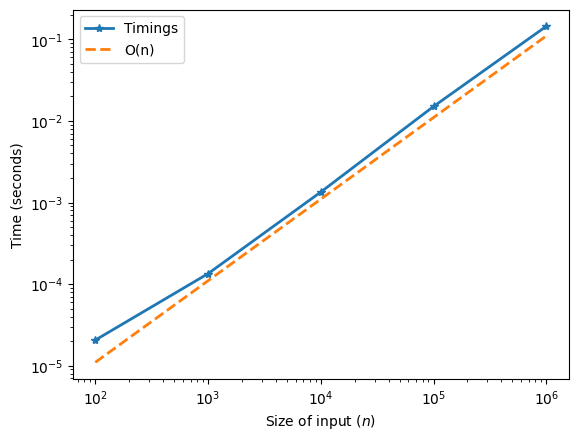

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

times = []
Ns = np.array([100, 1000, 10_000, 100_000, 1_000_000])
for n in Ns:
    x = np.random.random(size=n)
    # Start the time
    t0 = time.perf_counter()
    # Run the code
    find_biggest(x)
    # Stop the time and append the timing to the list
    times.append(time.perf_counter() - t0)

fig, ax = plt.subplots()
ax.loglog(Ns, times, label="Timings", marker="*", linewidth=2)
ax.loglog(Ns, 1.1 * 1e-7 * Ns, label="O(n)", linestyle="--", linewidth=2)
ax.legend()
ax.set_xlabel("Size of input ($n$)")
ax.set_ylabel("Time (seconds)")
plt.show()

Notice that we plot the times as a function of the input size in a `loglog` plot. Also, note that we plot the function $1.1 \times 10^{-7} \times N$, which is $\mathcal{O}(n)$. We see that the timings align very well with a function that is $\mathcal{O}(n)$, backing up the conclusion that the function is $\mathcal{O}(n)$.


### Another example: triangular numbers

Let us say we define an algorithm for triangular numbers, i.e., the sum of the numbers

$$1, 2, \ldots, n.$$

An algorithm for finding these is simply to carry out the sum step by step:
```Python
def triangular(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```
This function loops over $n$ numbers and carries out a constant number of steps for each number, meaning the cost of this algorithm will be $\mathcal{O}(n)$.

However, there is also an analytic expression for the $n$'th triangular number, namely: $n(n+1)/2$. This allows us to use the following alternative algorithm
```Python
def triangular(n):
    return n*(n+1)/2
```
What is the cost of this algorithm? We here perform one addition, one multiplication, and one division, regardless of what $n$ is, making this algorithm $\mathcal{O}(1)$. The fact that we found an analytic expression gave us a constant cost function, meaning it scales much better for large $n$ (in fact, it does not scale).


### Another example: Matrix-Matrix Multiplication

Presume we want to write a function to multiply two $n\times n$ matrices. What is the cost of such a function? The resulting matrix from this multiplication has $n\times n$ elements, so there are $n^2$ elements we need to compute.

To compute each element of the resulting matrix, we need to compute the dot product of the row of one matrix with the column of the other, as both have $n$ elements. This dot product requires $\mathcal{O}(n)$ operations ($n$ products and $n-1$ summations).

In the end, we compute $n^2$ elements at a cost of $\mathcal{O}(n)$ each, meaning the total cost of this matrix-matrix multiplication is $\mathcal{O}(n^3)$. Indeed, the cost of multiplying matrices grows very fast as the size of the matrices grows. If the matrices double in size, the cost increases eightfold.

Interestingly enough, the $\mathcal{O}(n^3)$ cost we find for the "naive" matrix-matrix multiplication algorithm turns out to be sub-optimal. Several clever techniques have been found to optimize this multiplication and make it scale better. This is very important for linear algebra computations involving large matrices, of which many exist.


```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Bound_on_matrix_multiplication_omega_over_time.svg/600px-Bound_on_matrix_multiplication_omega_over_time.svg.png
---
width: 600px
name: matrix-mult
---
This graph shows the best-scaling known algorithm for matrix-matrix multiplication over time. The current best scaling was published in 2014 by François Le Gall and has a scaling of $\mathcal{O}(n^{2.3728642...})$.
```

Looking at the graph and the improvements found over time, it is easy to start to wonder where it will end. As of now, the theoretical optimal scaling of matrix-matrix multiplication is unknown. However, we do know that there is a theoretical limit of $\mathcal{O}(n^2)$, simply due to the fact that multiplying the $n \times n$ matrices together requires at least reading out the elements of those matrices, which in itself is $\mathcal{O}(n^2)$. However, whether it is possible to make an algorithm that reaches $\mathcal{O}(n^2)$ is not known. No one has been able to prove or disprove that this limit is reachable.